# **Logistic Regression** #

**Imports**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample


**Loading Dataset**

In [30]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Checking for duplicates**

In [31]:
df.duplicated().sum()

0

**Checking for missing values**

In [32]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

**Dropping Unnecessary columns** 

In [33]:
#Dropping customer_id as it doesnt have any effect on results 
df = df.drop("customer_id", axis=1)

In [34]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Handling Categorical Variables**

We will convert the gender into Binary using Label Encoder

In [35]:
#converting the value of column to 0 or 1
from sklearn.preprocessing import LabelEncoder

variables = ['gender']

encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

We will convert the country into Nominal variable using OneHotEncoder

In [36]:
from sklearn.preprocessing import OneHotEncoder

variables = ['country']

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [37]:
df = df.drop("country_France", axis=1)
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


**Train/Test Split**

In [38]:
#Defining the dataset into X & Y 

X = df.drop(["churn"], axis=1)
y = df[["churn"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Scaling the values**

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Linear Regression Model**

In [40]:
model = LogisticRegression()
model.fit(X_train, y_train.iloc[:, 0])

LogisticRegression()

**Classification Error metrics**

In [41]:
#making test predictions 
predictions = model.predict(X_test)

In [42]:
# printing the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# getting overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2398
           1       0.59      0.21      0.31       602

    accuracy                           0.81      3000
   macro avg       0.71      0.59      0.60      3000
weighted avg       0.78      0.81      0.78      3000


Model overall accuracy: 81.20%


[[2307   91]
 [ 473  129]]


<Axes: >

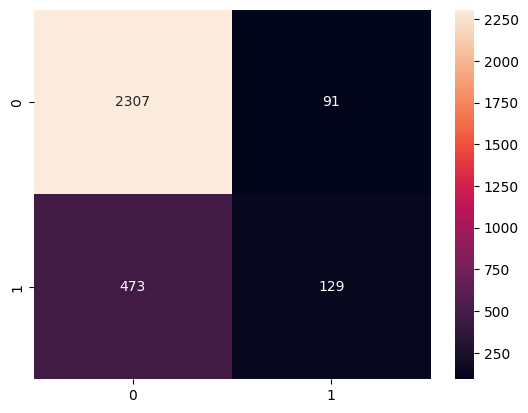

In [43]:
print(confusion_matrix(y_test, predictions))

sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [44]:
roc_auc_score(y, model.predict_proba(X.values)[:, 1])

0.5011530994077851

We can see that the model is uneven and very biased towards the majority Churn state so we will balance the data set to be more even 

**Balancing Dataset**

In [45]:
#checking total values of each category
print(df['churn'].value_counts())

churn
0    7963
1    2037
Name: count, dtype: int64


In [46]:
#ChatGPT was used for assisstence with balancing Dataset
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

X = df.drop('churn', axis=1)
y = df['churn']

smote = SMOTE(sampling_strategy=0.5, random_state=42)  
X_res, y_res = smote.fit_resample(X, y)




**Train/Test Split with new balanced dataset**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42,
stratify=y_res
)


**Scalling**

In [48]:
from sklearn.preprocessing import StandardScaler
from joblib import dump

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

dump(sc, "scaler.joblib")

['scaler.joblib']

**Logistic Regression**

In [49]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

**Metrics**

In [50]:
#making test predictions 
predictions = model.predict(X_test)

# printing the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# getting overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      2389
           1       0.60      0.75      0.67      1195

    accuracy                           0.75      3584
   macro avg       0.73      0.75      0.74      3584
weighted avg       0.77      0.75      0.76      3584


Model overall accuracy: 75.25%


The metrics show 75 percent accuracy which is not very good but its balanced event though model is performing slight poorly on minority target categoryits still better than previous model

[[1800  589]
 [ 298  897]]


<Axes: >

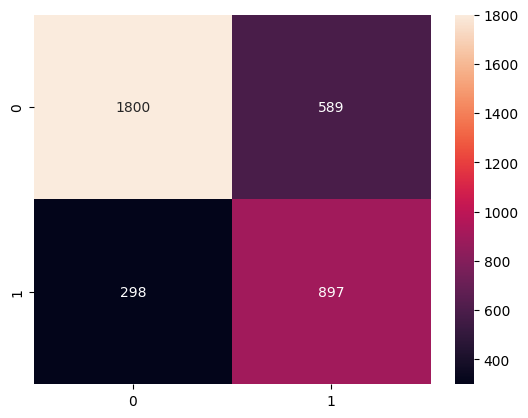

In [51]:
print(confusion_matrix(y_test, predictions))

sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [52]:
#We will check AUC score againsnt the new balanced dataset
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


0.8203113643249832

ROC AUC score of 0.82 shows that its performing good 

**Correlation Matrix**

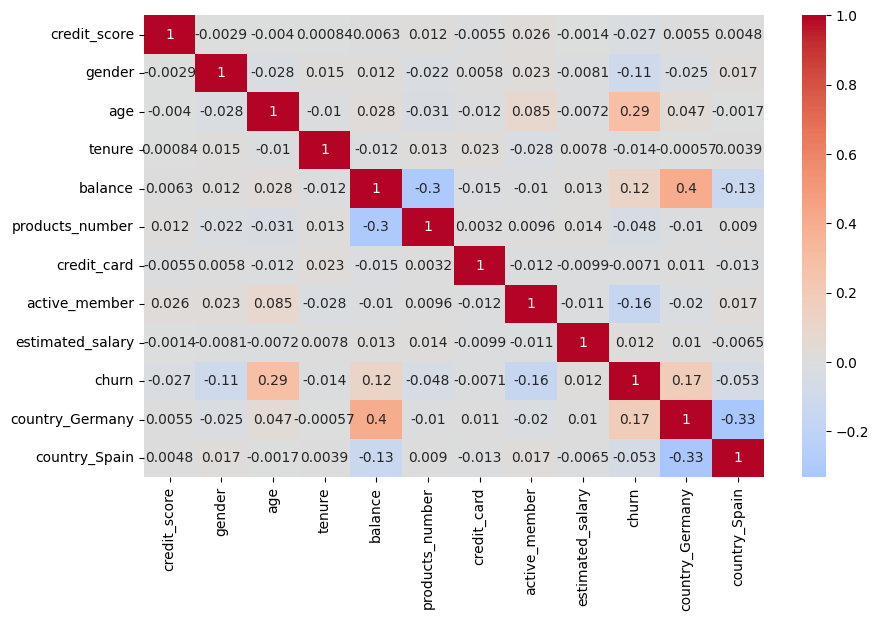

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.show()


we can see that the age is the most impactful feature and balance is also effect the target. the Cpountry Germany also has an impact

In [54]:
df.tail()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0
9999,792,0,28,4,130142.79,1,1,0,38190.78,0,0,0


In [55]:
# Gender -column: 0 => Female, 1 => Male
tester_row = {
    'credit_score': 771,
    'gender': 1,
    'age': 39,
    'tenure': 5,
    'balance': 0.0,
    'products_number': 2,
    'credit_card': 1,
    'active_member': 0,
    'estimated_salary': 96270.64,
    'country_Germany':0,
    'country_Spain':0

}

# creating a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])
tester_row = sc.transform(tester_row)

print("All probabilities by category:")
print(model.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Did this person churn (No/Yes):")
result = labels[model.predict(tester_row)[0]]
print(result)
print("-------------------")

All probabilities by category:
[[0.71068432 0.28931568]]

Did this person churn (No/Yes):
No
-------------------


In [56]:
from joblib import dump
dump(model, "logistic_regression.joblib")

['logistic_regression.joblib']

**Summary**

We have imported all the libraries first then we imported the data and checked for duplicates and misssing values and dropped irrelevant coloumn after that we converted non numerical variables such as gender and country as numerical values using LabelEncoder and OneHotEncoder. we split data, Scaled and trained the Logistic regression model and we found out that the model is heavily biased towards the majority target category so we balanced the dataset using SMOTE (Synthetic oversampling of minority class)
and retrained the model and checked metrics with previous model to compare and there was improvement in the balance of model even though some accuracy was reduced. ROC AUC for the first model showed 0.5 which is not very good but for the balanced model against new balanced data set it was 0.82 which is much better. The model doesnt work perfectly and still needs optimization but its working average at this stage which was tested with imaginary values.

Logistic Regression can be useful in predicting customer churn, forecasting sales, predicting dieses and other marketing applications.

The usage was relatively easy the challenging part was balancing the dataset and optimising it better.

The model could further be optimised by handling imbalance and focusing on more impactful features and their relation against each other.

